# Hough transform

Using the input step, we repeat the edge detection:

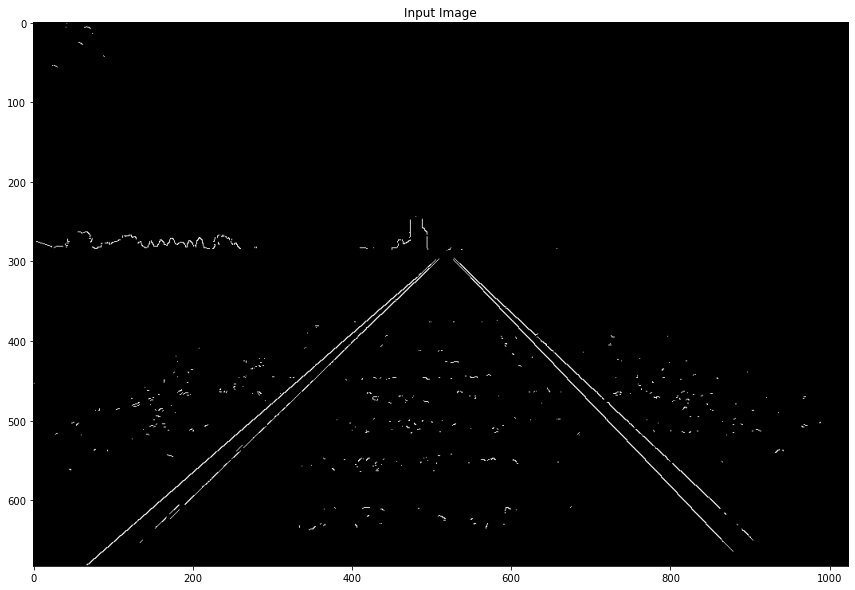

In [14]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np

input_dir = './input/'
in_img_name = 'hough_test.png'
in_img_name = 'Railroad.jpg'
in_img = cv.imread(input_dir + in_img_name, cv.IMREAD_GRAYSCALE)

hough_threshold = 300

# in_img = np.zeros((50,50), np.uint8)
# in_img[10, 25] = 1
# in_img[40, 20] = 1

canny_thresholds = [460, 500]
edges = cv.Canny(in_img, canny_thresholds[0], canny_thresholds[1])
in_img = edges
plt.figure(figsize=(15,10))
plt.imshow(in_img,cmap = 'gray')
plt.title('Input Image')
plt.show()

In [15]:
# Hough Line Transform
lines = cv.HoughLines(in_img, 1, np.pi / 180, hough_threshold)
lines = lines if lines is not None else np.array([])

print(lines.shape)

(3, 1, 2)


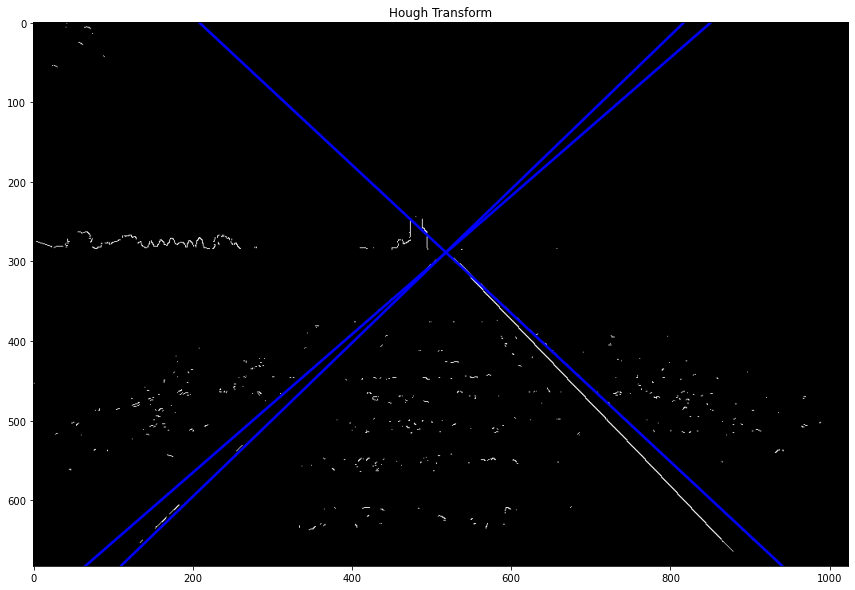

In [16]:
# Draw the lines
output = cv.cvtColor(in_img, cv.COLOR_GRAY2BGR)

scalar = 5e3
for i in range(len(lines)):
    rho, theta = lines[i][0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + scalar*(-b)), int(y0 + scalar*(a)))
    pt2 = (int(x0 - scalar*(-b)), int(y0 - scalar*(a)))
    cv.line(output, pt1, pt2, (0,0,255), 2, cv.LINE_AA)

plt.figure(figsize=(15,10))
plt.imshow(output)
plt.title('Hough Transform')
plt.show()